In [4]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('/content/sample_data/literacy_rates_updated.csv')

print(df.duplicated().sum())

print("Original dataset shape:", df.shape)
print(df.head())

df = df.drop_duplicates()

print(df.dtypes)

print("Region:", df['Region'].unique())
print("Country:", df['Country'].unique())
print("Year:", df['Year'].unique())
print("Age:", df['Age'].unique())
print("Gender:", df['Gender'].unique())
print("Literacy rate sample:", df['Literacy rate'].head(10).tolist())

df['Region'] = df['Region'].astype(str).str.strip()
df['Country'] = df['Country'].astype(str).str.strip()
df['Age'] = df['Age'].astype(str).str.strip()
df['Gender'] = df['Gender'].astype(str).str.strip()

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

df['Literacy rate'] = df['Literacy rate'].astype(str).str.replace('%', '', regex=False)
df['Literacy rate'] = pd.to_numeric(df['Literacy rate'], errors='coerce')


print(df.isnull().sum())

df['Literacy rate'] = df['Literacy rate'].fillna(df['Literacy rate'].median())
df['Year'] = df['Year'].fillna(df['Year'].mode()[0])
df['Country'] = df['Country'].fillna('Unknown')
df['Age'] = df['Age'].fillna('Unknown')
df['Gender'] = df['Gender'].fillna('Unknown')
df['Region'] = df['Region'].fillna('Unknown')

df['Gender'] = df['Gender'].str.title()
df['Age'] = df['Age'].str.title()

df = df[(df['Literacy rate'] >= 0) & (df['Literacy rate'] <= 100)]

df['Year'] = df['Year'].astype('int64')
df['Literacy rate'] = df['Literacy rate'].astype('float64')

print(df.shape)
print(df.dtypes)

Original dataset shape: (3313, 6)

First 5 rows:
                      Region      Country  Year    Age  Gender Literacy rate
0  Central and Southern Asia  Afghanistan  2011    <15  female     0.1761206
1  Central and Southern Asia  Afghanistan  2011    <15    male      0.454171
2                        NaN  Afghanistan  2011  15-24  female     0.3211322
3                        NaN  Afghanistan  2011  15-24    male     0.6187907
4  Central and Southern Asia  Afghanistan  2011  25-64  female     0.0841276

Duplicates found: 10
Shape after removing duplicates: (3303, 6)

Data types:
Region           object
Country          object
Year             object
Age              object
Gender           object
Literacy rate    object
dtype: object

Unique values in each column:
Region: ['Central and Southern Asia' nan 'Eastern and South-Eastern Asia'
 'Europe and Northern America' 'Latin America and the Caribbean'
 'Northern Africa and Western Asia' 'Oceania' 'Sub-Saharan Africa']
Country: ['Afgh

/tmp/ipython-input-4-2415164001.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'] = df['Region'].astype(str).str.strip()
/tmp/ipython-input-4-2415164001.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Country'] = df['Country'].astype(str).str.strip()
/tmp/ipython-input-4-2415164001.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

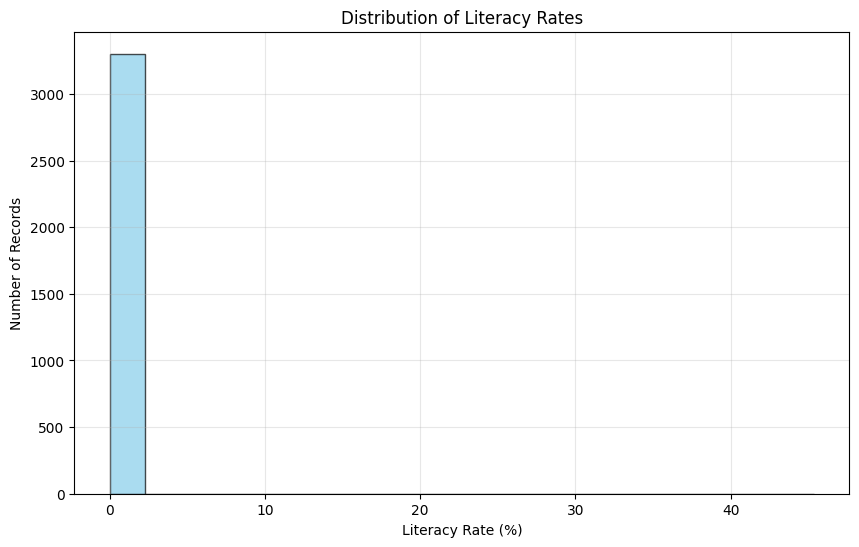

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['Literacy rate'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Number of Records')
plt.title('Distribution of Literacy Rates')
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# Extream distribution records concentrated at very low literacy levels

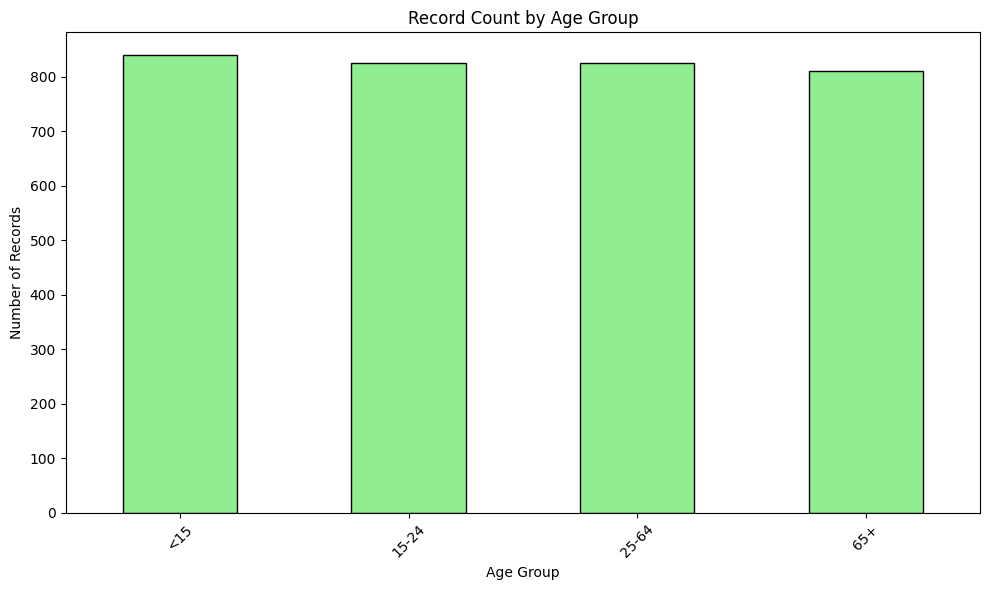

In [6]:
plt.figure(figsize=(10, 6))
age_counts = df['Age'].value_counts()
age_counts.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel('Age Group')
plt.ylabel('Number of Records')
plt.title('Record Count by Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# The Bar plot shows fairly balanced data records  across all ages hence showing even distributed recording keeping of literacy rate in all age groups

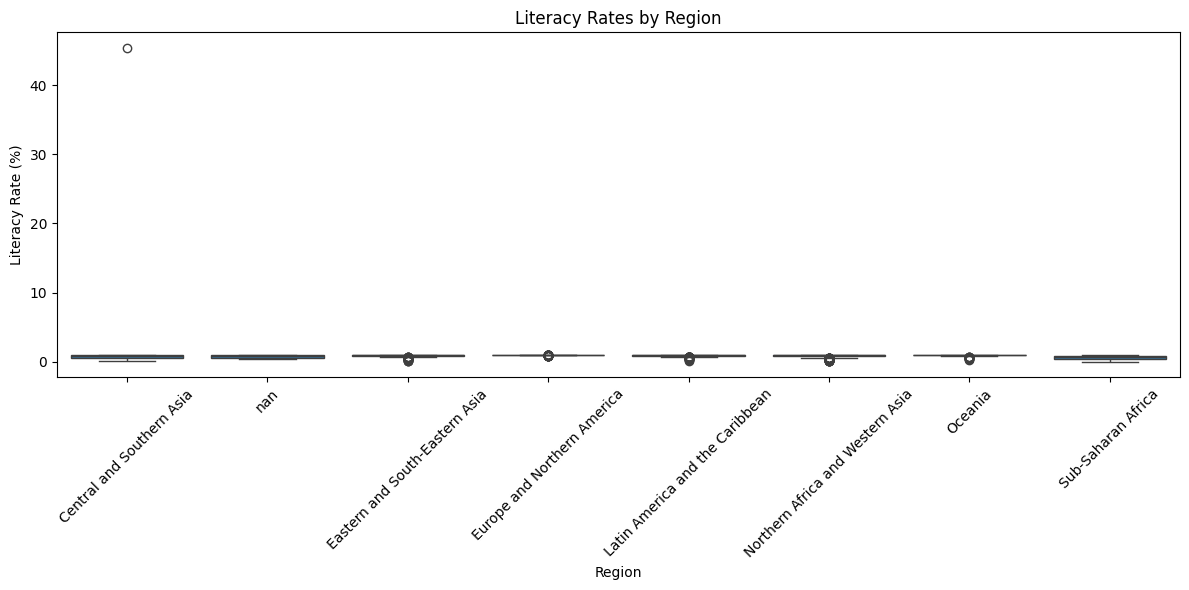

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Literacy rate', data=df)
plt.xticks(rotation=45)
plt.title('Literacy Rates by Region')
plt.ylabel('Literacy Rate (%)')
plt.tight_layout()
plt.show()

In [ ]:
# The Box plot shows that all regions have very low literacy levels but some regions specifically central and southern Asia are nearing 40% which shows that some regions have achieved some education

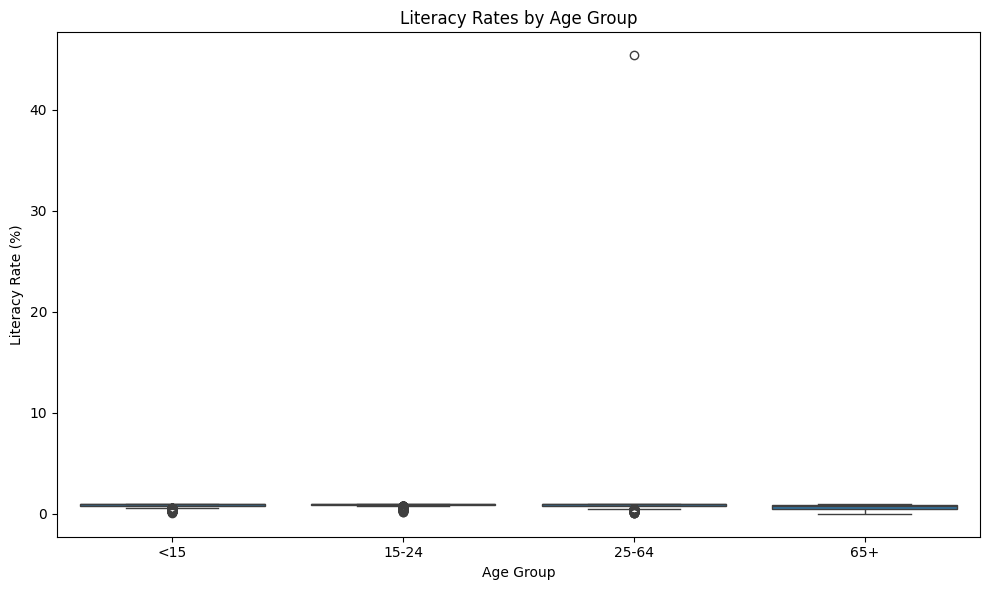

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age', y='Literacy rate', data=df)
plt.title('Literacy Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Literacy Rate (%)')
plt.tight_layout()
plt.show()

In [ ]:
# Simlarly as above, the Box plot shows low levels of literacy across all age groups but some age groups, specifically 25-64 have achieved some education and this is shown with nearness at 40% and above